In [ ]:
# init repo notebook
!git clone https://github.com/rramosp/ppdl.git
!mv ppdl/content/init.py ppdl/content/local .

# 1. Probabilities and distributions

In [26]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
from rlxutils import subplots
import sys
import init
%matplotlib inline

In [31]:
import sys; sys.path.insert(0, "..")
from init import *

## Populations of things

A probability distribution assigns numbers between 0 and 1 to things. This numbers are named **probabilities**, and the sum of the probabilities assigned to all things must **add up to 1**.

This might be interpreted in different ways:

- **INTERPRETATION 1**: As an **actual** proportion of different kinds of things in a set.
- **INTERPRETATION 2**: As a quantification of our **knowledge** of a proportion of different kinds of things in a set.

The sets that we are talking about can be **finite** or **infinite**. For the moment, we'll deal with **finite** sets of things.

The **things** we are talking about can be many:

- People described by certain atributes (height, income, ...)
- The weights of the connections of a neural network.
- The values of intensities of the pixels in an image.

--

## Probabilities as actual proportions

let's take **INTERPRETATION 1** above and inspect an image

**MAYBE USE A SIMPLER EXAMPLE FIRST**

(246, 360, 3)

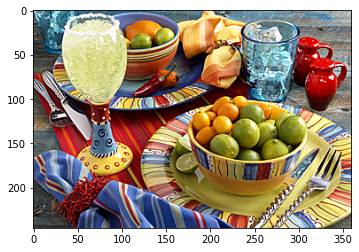

In [21]:
from sklearn.externals._pilutil import imread
img = imread(local_("imgs/sample_img.jpg"))
plt.imshow(img)
img.shape

inspect the distribtuion of intensity values on each channel.

This is the **empirical** distribution. We do not have an analytical formula, just the data and the histograms.

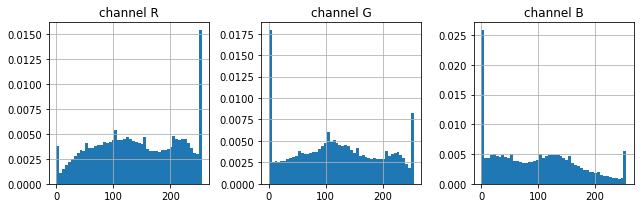

In [30]:
for ax,i in subplots(3):
    plt.hist(img[...,i].flatten(), density=True, bins=50);
    plt.grid();
    plt.title(f"channel {'RGB'[i]}")
plt.tight_layout()

some probabilities measured on the data (i.e. **proportions** existing in the data)

In [34]:
# the probability of a pixel to have an intensity >200 in each channel
for i in range(3):
    
    print (f"P({'RGB'[i]}>200)", np.mean(img[:,:,i]>200))


P(R>200) 0.2754516711833785
P(G>200) 0.19523486901535683
P(B>200) 0.09034552845528455


## Conditional probabilities

We consider only certain cases and report the **proportions** with respect to those cases **ONLY**.

For instance, the probability of observing a blue value > 200, given that the pixel has a red intensity > 200

This is, $P(b>200|r>200)$

In [35]:
np.mean((img[:,:,2]>200)&(img[:,:,0]>200))/np.mean((img[:,:,0]>200))

0.17639583504140363

a more intuitive way to do it is in two steps:
    
1. Keep only the blue channel of the pixels whose values in red are > 200
2. In those pixels count the proportion with blue > 200

In [40]:
b200 = img[:,:,2][img[:,:,0]>200]
np.mean(b200>200)

0.17639583504140363

we can condition on anything, for instance, on neighboring pixels.

## Marginalization

It can be considered as the oposite operation from conditioning, REALLY??? check this

|things|number of different things|interpretation of probability|
|:---:|:-|-|
|balls of different colors | 3 colors| the proportion of existing balls of each color|
|balls of different colors | 3 colors| the proportion of existing balls of each color|



## Analytical vs empirical

Regularly we want to do two things with distributions: sample and compute probaiblities.

If we have an empirical distribution, like above we can compute probabilities by counting, although this becomes **complicated** in higher dimensions or sparse data (**SHOW EXAMPLES**)

It would be nice to have an analytical distribution. This is, a **formula**


## Continuous and discrete distributions

- examples
- marginalization is summation in discrete distributions, integration in continuous